# Statistical analysis of data for Predicting Employee Attrition 
*By Bhavya Bhargava*<br>

### **Why Perform Statistical Analysis on HR Attrition Data?**  

After preparing HR attrition data and visualizing its trends, **statistical analysis** helps validate insights, uncover deeper relationships, and support data-driven decision-making.  

📊 **Quantifies Key Attrition Drivers** – Statistical tests measure the significance of factors like job satisfaction, salary hikes, and promotions in influencing turnover.  

📉 **Detects Correlations and Dependencies** – Identifies relationships between variables, such as whether longer tenure reduces attrition risk or if frequent travel increases it.  

📈 **Builds Predictive Insights** – Regression analysis and hypothesis testing forecast attrition trends and highlight high-risk employee groups.  

🔍 **Ensures Data-Driven Decision-Making** – Statistical validation helps avoid assumptions, providing HR teams with actionable, evidence-based strategies.  

By leveraging statistical analysis, organizations move beyond **visual trends** to **quantifiable insights**, enabling more effective retention strategies and workforce planning. 🚀
<br>
<br>
_Now let's start with creating a comprehensive statistical analysis following a streamlined approach and key relevant analysis techniques._
<br>
<br>
Let's initialize the environmment for this statistical analysis.

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings

# Configuring visualization settings
sns.set(style="white", font_scale=1.2)
sns.set_context("notebook")
warnings.filterwarnings('ignore')

# Reading the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_Processed.csv')

# For ignoring unncecessary warnings that may arise
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

We should first get an overview of our data so as to verify it's shape and the various types of it's features.

In [4]:
# Initial Data Overview
print("Dataset Shape:", df.shape)
print("\nSample of numerical features:")
print(df.select_dtypes(np.number).columns.tolist())
print("\nSample of categorical features:")
print(df.select_dtypes(include="object").columns.tolist())

Dataset Shape: (1470, 51)

Sample of numerical features:
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverallSatisfaction', 'CareerProgressionRatio', 'YearsWithoutPromotion', 'AnnualSalary', 'SalaryHikeImpact', 'WorkLoadIndex', 'BusinessTravel_Encoded', 'Department_Encoded', 'Education_Encoded', 'EducationField_Encoded', 'EnvironmentSatisfaction_Encoded', 'Gender_Encoded', 'JobInvolvement_Encoded', 'JobRole_Encoded', 'JobSatisfaction_Encoded', 'MaritalStatus_Encoded', 'OverTime_Encoded', 'PerformanceRating_Encoded', 'RelationshipSatisfaction_Encoded', 'WorkLifeBalance_Encoded']

Sample of categorical features:
['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolveme

As the shape and feature data is consistent from the preparation stage we can move forward with the various statistical analysis tests.

We can start with...

<b><u>The ANOVA Test </u></b>for Numerical Features which can be used to test if there are significant differences in numerical variables between employees who left (attrition=Yes) and stayed (attrition=No).

Key Test:
- The higher the F-score, the more that variable differs between those who leave vs stay

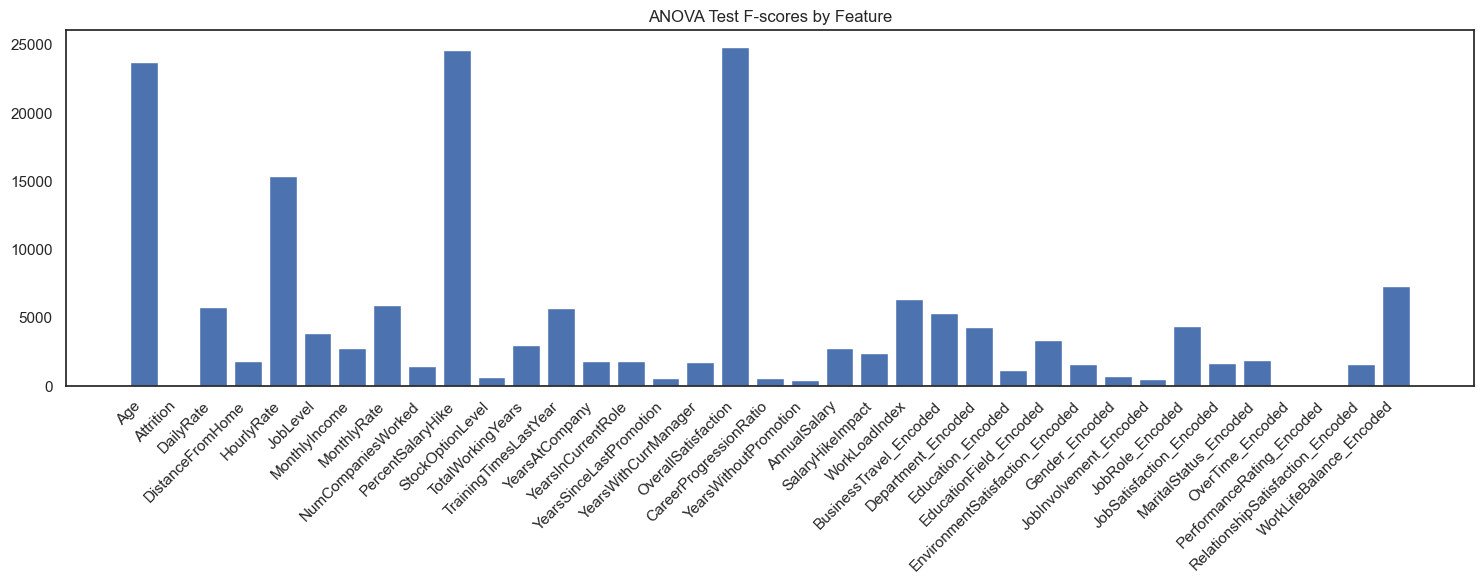

In [5]:
# ANOVA Test for Numerical Features
def perform_anova_test(data):
    num_cols = data.select_dtypes(np.number).columns
    df_copy = data.copy()
    df_copy["Attrition"] = df_copy["Attrition"].replace({"No": 0, "Yes": 1})
    
    f_scores = {}
    p_values = {}
    
    for column in num_cols:
        f_score, p_value = stats.f_oneway(df_copy[column], df_copy["Attrition"])
        f_scores[column] = f_score
        p_values[column] = p_value
    
    return f_scores, p_values

f_scores, p_values = perform_anova_test(df)

# Visualize ANOVA results
plt.figure(figsize=(15, 6))
plt.bar(f_scores.keys(), f_scores.values())
plt.xticks(rotation=45, ha='right')
plt.title("ANOVA Test F-scores by Feature")
plt.tight_layout()
plt.show()

Observations:
- Variables like <u>Age, PercentSalaryHike, HourlyRate and OverallSatisfaction </u>show very high F-scores, meaning they strongly influence attrition.

